# [CSE426] Image Processing
Teaching Assistant: Hyunmin Ban (hmban1996@khu.ac.kr)

Professor: Hui Yong Kim (hykim.v@khu.ac.kr)

---

# P5: Segmentation by Thresholding

## P5.A: Otsu's Method를 이용한 Binary Thresholding (5점)

### 실습내용
실습은 다음 순서로 진행됩니다.
- 0) 실습에서 사용되는 패키지 import
- 1) 주어진 이미지 loading
- 2) 함수 정의
- 3) Matplotlib로 이미지 확인

### 점수
- 2) 빈칸 합 5점

### 제출방법
- .ipynb 파일과 함께 .html 파일 (File -> export (Download) as -> HTML)도 함께 제출하세요. 하나만 제출할시 감점이 있습니다.
- e-campus에 .ipynb 파일과 .html 파일을 zip파일로 하지 말고 따로따로 올리세요.

## Imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

## 1) Load Image

In [2]:
img = cv2.imread('yeast_USC.tif', cv2.IMREAD_GRAYSCALE) # 이미지 파일 읽기

cv2.imshow('image', img)      
cv2.waitKey(0)                
cv2.destroyAllWindows()       

## 2) Define Function

**요구사항**
 - 1) Otsu's Method는 Smoothing을 시킨 이미지를 입력값으로 넣습니다
 - 2) OpenCV의 Threshold 함수를 사용하지 않고 강의자료의 Otsu's method를 구현하세요
 - 3) Thresholding 함수의 입력으로 1)에서 만든 Smoothed image가 들어갑니다
 - 4) Otsu_Tresholding 함수의 출력값으로 threshold 값과 thresholding을 적용한 이미지를 return하게 하세요
 - 5) 자신이 구현한 Otsu's Method와 OpenCV Threshold 함수의 [threshold 값]과 [결과 이미지]를 비교하세요 

In [3]:
img = cv2.GaussianBlur(img, (9, 9), 1)

In [4]:
"""
def Otsu_Thresholding(image):
    <your code>
    
    return threshold, result # Otsu Method로 구한 threshold 값과 thresholding을 적용한 이미지를 출력값으로 하세요
"""
def Otsu_Thresholding(image):
    smoothed = cv2.GaussianBlur(image, (5,5), 0)
    hist = cv2.calcHist([smoothed], [0], None, [256], [0, 256])
    hist_norm = hist.ravel() / hist.max()
    Q = hist_norm.cumsum()
    bins = np.arange(256)
    fn_min = np.inf
    thresh = -1
    for i in range(1, 256):
        p1, p2 = np.hsplit(hist_norm, [i])  # probabilities
        q1, q2 = Q[i], Q[255]-Q[i]  # cum sum of classes
        b1, b2 = np.hsplit(bins, [i])  # weights
        # finding means and variances
        m1, m2 = np.sum(p1*b1) / q1, np.sum(p2*b2) / q2
        v1, v2 = np.sum(((b1-m1)**2)*p1) / q1, np.sum(((b2-m2)**2)*p2) / q2
        # calculates the minimization function
        fn = v1*q1 + v2*q2
        if fn < fn_min:
            fn_min = fn
            thresh = i
    _, result = cv2.threshold(smoothed, thresh, 255, cv2.THRESH_BINARY)
    return thresh, result


In [6]:
# Gaussian Blur을 적용한 이미지를 Otsu thresholding 함수에 적용하세요
my_thresh, binary_img = Otsu_Thresholding(img)
# opencv의 threshold 함수로 Otsu Method를 사용하세요
thresh, otsu_opencv =  cv2.threshold(cv2.GaussianBlur(img, (5,5), 0), 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

C:\Users\jt200\AppData\Local\Temp\ipykernel_2088\3696992508.py:20: RuntimeWarning: invalid value encountered in scalar divide
  m1, m2 = np.sum(p1*b1) / q1, np.sum(p2*b2) / q2
C:\Users\jt200\AppData\Local\Temp\ipykernel_2088\3696992508.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  m1, m2 = np.sum(p1*b1) / q1, np.sum(p2*b2) / q2
C:\Users\jt200\AppData\Local\Temp\ipykernel_2088\3696992508.py:21: RuntimeWarning: invalid value encountered in multiply
  v1, v2 = np.sum(((b1-m1)**2)*p1) / q1, np.sum(((b2-m2)**2)*p2) / q2


## 3) Plot Image

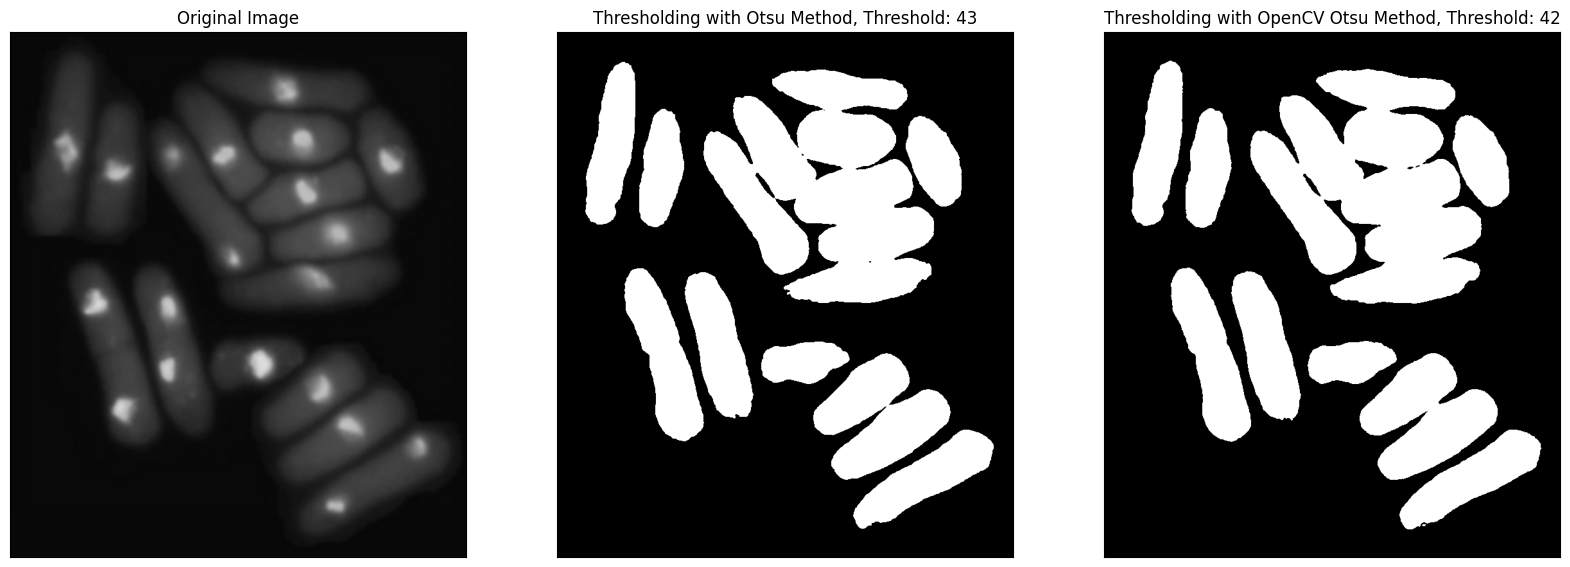

In [8]:
plt.figure(figsize = (20, 15))
images = {'Original Image':img, 'Thresholding with Otsu Method, Threshold: %d'%my_thresh : binary_img, 'Thresholding with OpenCV Otsu Method, Threshold: %d'%thresh: otsu_opencv}

for i, (k, v) in enumerate(images.items()):
    plt.subplot(1,3,i+1)
    plt.title(k)
    plt.imshow(cv2.cvtColor(v, cv2.COLOR_GRAY2RGB))
    plt.xticks([]), plt.yticks([])
    
plt.show()

---

## P5.B: Local Statistics를 이용한 Binary Thresholding (5점)

### 실습내용
실습은 다음 순서로 진행됩니다.
- 1) 이미지 loading
- 2) 함수 사용
- 3) Matplotlib로 이미지 확인
- 4) Discussion

### 점수
- 2) 빈칸에 대한 합 5점
- Discussion 내용이 부실할 경우 감점

## 1) Load Image

In [10]:
img = cv2.imread('doc.tif', cv2.IMREAD_GRAYSCALE)
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 2) Use Function

**요구사항**
- 1) Local Thresholding 중에서 local 평균과 표준편차를 자유롭게 이용해서 binary thresholding을 구현하세요  
**예시: T(x,y) = A * mean(x,y), T(x,y) = A * mean(x,y)+B * std_dev(x,y), T(x,y) = mean(x,y) – C (A, B, C는 상수) 등등**  
- 2) 출력영상의 크기가 입력영상의 크기와 같아지도록 입력영상에 padding을 사용하세요  
padding을 사용할 때 cv2의 copyMakeBorder 함수를 사용해도 됩니다  
- 3) OpenCV의 Adaptive Thresholding을 사용하지 마세요. 
- 4) 출력영상이 글자만 깨끗하게 분할되도록 하세요. 아래 사진은 예시이며 강의자료 32p.를 참고하세요.

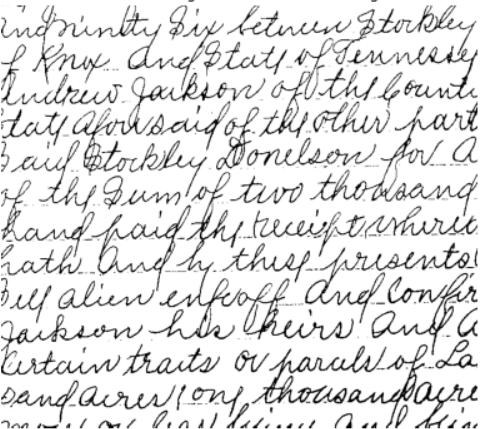

In [46]:
def Local_Thresholding(image, mask_size, param):
    # Padding
    pad_size = mask_size // 2
    image = np.pad(image, (pad_size, pad_size), mode='reflect')
    
    # Gaussian blur
    image = cv2.GaussianBlur(image, (mask_size, mask_size), 0)
    
    # Thresholding
    result = np.zeros_like(image)
    mean = cv2.boxFilter(image, -1, (mask_size, mask_size), normalize=False)
    threshold = mean * param
    result[image > threshold] = 255
    
    # Crop result and threshold images
    result = result[pad_size:-pad_size, pad_size:-pad_size]
    threshold = threshold[pad_size:-pad_size, pad_size:-pad_size]
    
    return np.uint8(threshold), np.uint8(result)


In [47]:
threshold, local_thresh = Local_Thresholding(img, 9, 10)

# 구현한 Otsu Thresholding 함수를 사용하세요
my_thresh, Otsu_Thresh = Otsu_Thresholding(img)

C:\Users\jt200\AppData\Local\Temp\ipykernel_2088\3696992508.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  m1, m2 = np.sum(p1*b1) / q1, np.sum(p2*b2) / q2
C:\Users\jt200\AppData\Local\Temp\ipykernel_2088\3696992508.py:23: RuntimeWarning: invalid value encountered in scalar multiply
  fn = v1*q1 + v2*q2


## 3) Plot Image

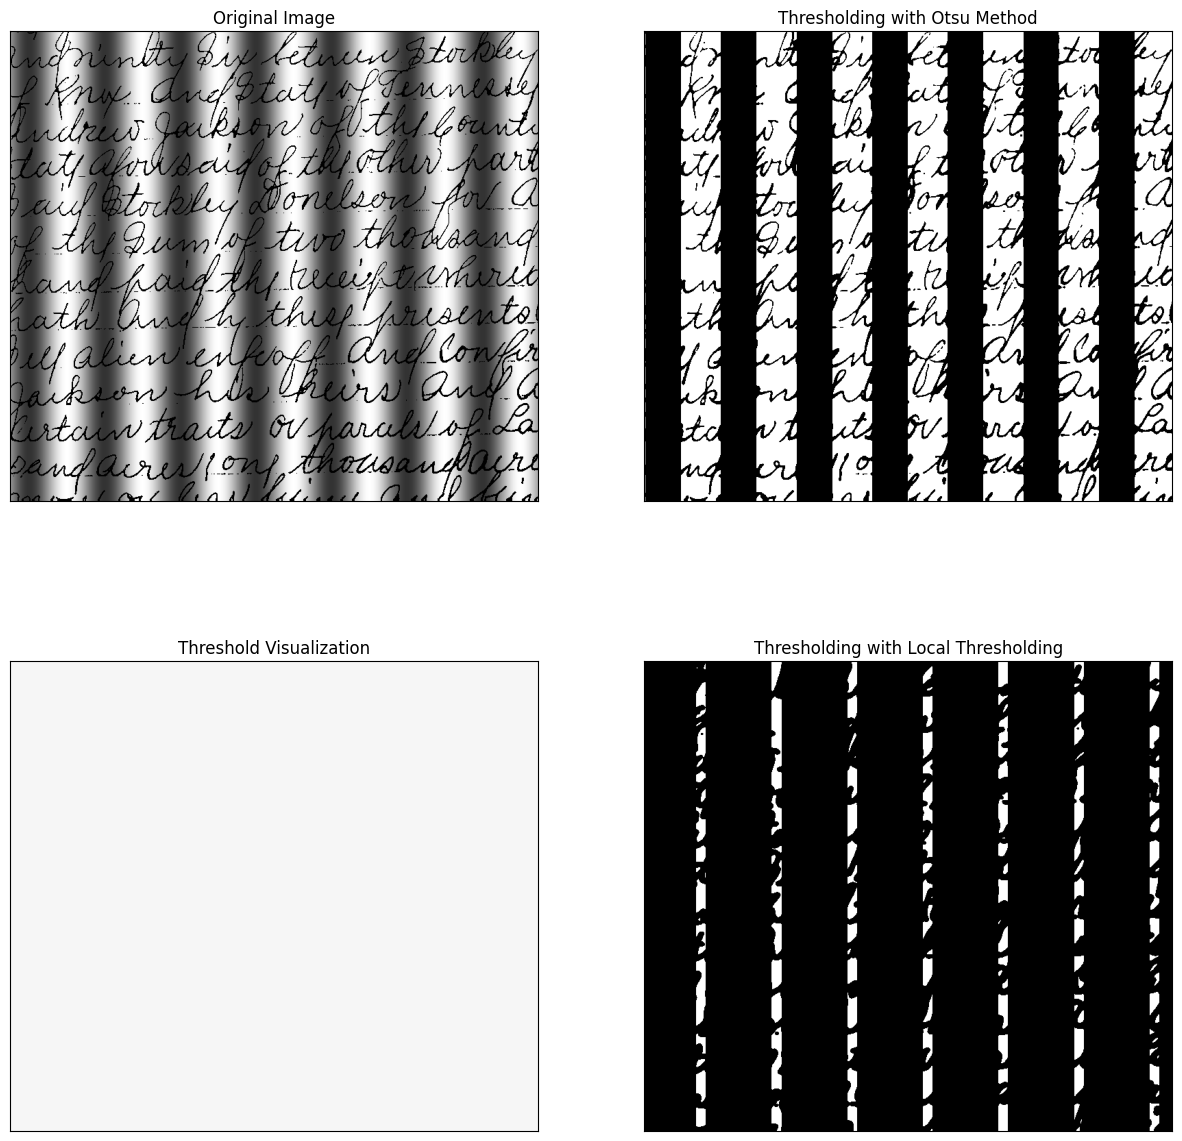

In [48]:
plt.figure(figsize = (15, 15))
images = {'Original Image':img, 'Thresholding with Otsu Method' : Otsu_Thresh, 
          'Threshold Visualization': threshold, 'Thresholding with Local Thresholding': local_thresh}

for i, (k, v) in enumerate(images.items()):
    plt.subplot(2,2,i+1)
    plt.title(k)
    plt.imshow(cv2.cvtColor(v, cv2.COLOR_GRAY2RGB))
    plt.xticks([]), plt.yticks([])
    
plt.show()

## 4) Discussion

**1) Otsu's Method에 대해 설명하고, Basic Threshold 방법대비 어떤 경우에 유리할 지 논하세요.**

Otsu's Method는 입력 이미지의 히스토그램 분포를 이용하여 전체 분산이 최소가 되는 임계값을 자동으로 찾아내는 방법이다. 이미지의 분포와는 상관없이, 최적의 임계값을 계산할 수 있다.또한, Threshold 값을 자동으로 계산하기에 사용자가 값을 조정할 필요가 없으며, 어떤 종류의 이미지 분포에도 적용할 수 있다. 

따라서, 입력 이미지가 대조적이거나 밝기 분포가 일정하지 않은 이미지에서 Otsu's Method가 유리하다.

**2) P5.B의 Local Thresholding을 구현 했을 때 사용한 방법과 그 방법에 의해 어떻게 조명 변화가 제거될 수 있었는 지 원리를 설명하세요.**


Local Thresholding은 이미지를 작은 조각으로 나눈 후, 각각의 작은 조각에 대해 threshold 값을 지정하고, binary 이미지로 변환하는 방법이다.

조명이 일정하지 않은 경우 threshold 값이 하나라면 밝기가 다른 곳에서 부적절한 threshold가 적용될 수 있다.

하지만 Local Thresholding을 사용하면 이미지가 작은 조각이기에 조각에 대하여 적절한 threshold 값을 적용할 수 있다. 또한, 이미지를 나누기 전에 padding을 적용하여 이미지의 가장자리 부분에서도 적절한 threshold 값을 적용한다.

---